In [1]:
import pandas as pd
import seaborn as sns

import nltk
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

nltk.download('punkt')
# !python3 -m spacy download en

[nltk_data] Downloading package punkt to /Users/marcus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
grey = (187/255, 187/255, 187/255)
darkgreen = (51/255, 117/255, 56/255)
teal = (93/255, 168/255, 153/255)
blue = (148/255, 203/255, 236/255)
yellow = (220/255, 205/255, 125/255)

color_pallete = sns.color_palette([grey, darkgreen, teal, blue, yellow])

# Feedback Analysis

In [3]:
feedback_df = pd.read_csv('../Menagerie/data/grades.csv', index_col=0)
feedback_df = feedback_df[~feedback_df['grade'].isnull()]
feedback_df

,assignment_number,comments,skill,participant_id,batch,grade
0,18.0,The code use meaningful identifier names and a...,Readability,15,1,B+
1,620.0,Code is well organized into logical classes an...,Readability,15,1,A+
2,466.0,"The code is well-organized, consistently inden...",Readability,15,1,A-
3,591.0,The code is well organized and readable. Inden...,Readability,15,1,A-
4,587.0,The code is well organized and readable. Inden...,Readability,15,1,A-
...,...,...,...,...,...,...
15,58.0,NaN,Documentation,14,1,A++
16,353.0,NaN,Documentation,14,1,A++
17,422.0,NaN,Documentation,14,1,A++
18,480.0,NaN,Documentation,14,1,A++


## Multiple Graders

In [5]:
def map_participant_group(participant_id):
    if participant_id <= 4:
        return "1-4"
    elif 4 < participant_id <= 8:
        return "5-8"
    elif 8 < participant_id <= 12:
        return "9-12"
    elif 12 < participant_id <= 16:
        return "13-16"
    elif 16 < participant_id <= 20:
        return "17-20"
    elif 20 < participant_id <= 24:
        return "21-24"
    elif 24 < participant_id <= 28:
        return "25-28"

feedback_df['group'] = feedback_df['participant_id'].apply(map_participant_group)
feedback_df['group'] = pd.Categorical(feedback_df['group'], categories=['1-4', '5-8', '9-12', '13-16', '17-20', '21-24', '25-28'])
feedback_df = feedback_df.sort_values('group', ascending=True)
feedback_df.to_csv('../data/inter_rater.csv')
feedback_df

,assignment_number,comments,skill,participant_id,batch,grade,group
0,302.0,The code demonstrates a high level of organisa...,Readability,3,2,A++,1-4
3,36.0,To better differentiate between preys and pred...,Code Elegance,2,1,A-,1-4
2,274.0,Code is written is a way that is readable and ...,Code Elegance,2,1,A-,1-4
1,554.0,Code is maintainable with good use of abstract...,Code Elegance,2,1,A-,1-4
0,316.0,May be useful to have superclass for preys and...,Code Elegance,2,1,A,1-4
...,...,...,...,...,...,...,...
19,462.0,No java source files were included in the subm...,Correctness,28,2,F,25-28
18,454.0,The student has implemented all baseline requi...,Correctness,28,2,A++,25-28
17,287.0,The student implemented all baseline requireme...,Correctness,28,2,A,25-28
12,510.0,NaN,Code Elegance,26,2,B+,25-28


### Length

In [6]:
feedback_df['comments'] = feedback_df['comments'].fillna("No comment supplied")
feedback_df['length'] = feedback_df['comments'].apply(len)
feedback_df

,assignment_number,comments,skill,participant_id,batch,grade,group,length
0,302.0,The code demonstrates a high level of organisa...,Readability,3,2,A++,1-4,108
3,36.0,To better differentiate between preys and pred...,Code Elegance,2,1,A-,1-4,141
2,274.0,Code is written is a way that is readable and ...,Code Elegance,2,1,A-,1-4,57
1,554.0,Code is maintainable with good use of abstract...,Code Elegance,2,1,A-,1-4,54
0,316.0,May be useful to have superclass for preys and...,Code Elegance,2,1,A,1-4,93
...,...,...,...,...,...,...,...,...
19,462.0,No java source files were included in the subm...,Correctness,28,2,F,25-28,105
18,454.0,The student has implemented all baseline requi...,Correctness,28,2,A++,25-28,213
17,287.0,The student implemented all baseline requireme...,Correctness,28,2,A,25-28,144
12,510.0,No comment supplied,Code Elegance,26,2,B+,25-28,19


/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_70675/4214619634.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  length_plt = sns.stripplot(feedback_df, x='group', y='length', hue='skill', dodge=True, palette=color_pallete)


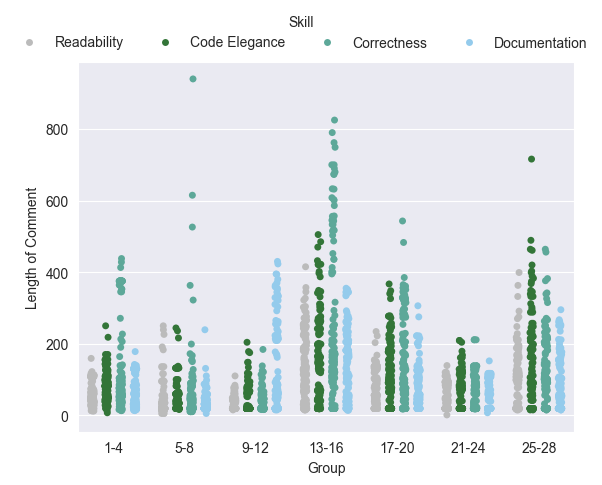

In [9]:
length_plt = sns.stripplot(feedback_df, x='group', y='length', hue='skill', dodge=True, palette=color_pallete)
length_plt.set(xlabel='Group', ylabel='Length of Comment')
# sns.move_legend(length_plt, "upper left", bbox_to_anchor=(1, 1), title='Skill')
sns.move_legend(
    length_plt, "lower center",
    bbox_to_anchor=(.45, 1), ncol=4, title='Skill', frameon=False,
)
length_plt.get_figure().savefig('../plots/inter_rater_length.pdf', bbox_inches='tight')

### Comment Similarity
- Same plot as Intra-rater or something with heatmaps maybe a facet grid (skill, group, assignment??)
- Calculate cosine similarity for each pair for each skill, group and assignment
  - Generate n x n similarity matrix
  - Compute the average for the matrix
  - Discuss on Monday?

In [10]:
inter_rater_sim_df = pd.read_csv('../data/inter_rater_sim.csv')
inter_rater_sim_df[:100]

,group,skill,assignment_number,participant_id_1,participant_id_2,feedback_1,feedback_2,sim
0,1-4,Readability,302.0,1,2,Good code readability.,No comment supplied,0.147519
1,1-4,Readability,302.0,1,3,Good code readability.,The code demonstrates a high level of organisa...,0.507659
2,1-4,Readability,302.0,1,4,Good code readability.,"Code not very easy to read, names of variables...",0.506794
3,1-4,Readability,302.0,2,3,No comment supplied,The code demonstrates a high level of organisa...,0.065517
4,1-4,Readability,302.0,2,4,No comment supplied,"Code not very easy to read, names of variables...",0.123910
...,...,...,...,...,...,...,...,...
95,1-4,Readability,327.0,3,4,The code demonstrates a high level of organisa...,Very easy to understand and to read,0.284639
96,1-4,Readability,219.0,1,2,Generally good readability.,Some method names are misleading,0.149344
97,1-4,Readability,219.0,1,3,Generally good readability.,The code demonstrates a high level of organisa...,0.309150
98,1-4,Readability,219.0,1,4,Generally good readability.,Easy to read,0.577006


In [11]:
def generate_heatmap_data(skill, group):
    temp_df = inter_rater_sim_df[(inter_rater_sim_df['skill'] == skill) & (inter_rater_sim_df['group'] == group)].sort_values(['participant_id_1', 'participant_id_2'])

    
    temp_df = temp_df.pivot_table(index='participant_id_1', columns='participant_id_2', values='sim')
    return temp_df

In [12]:
test_df = generate_heatmap_data('Correctness', '1-4')

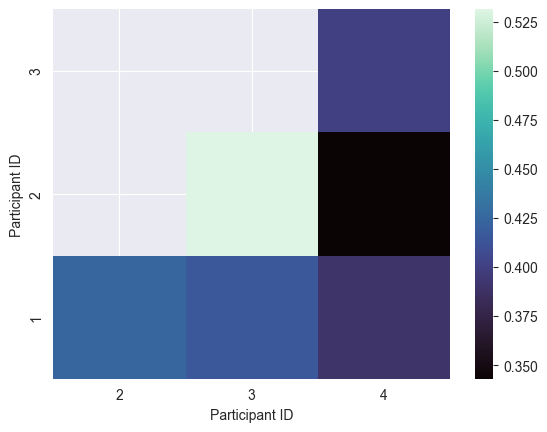

In [13]:

ax = sns.heatmap(test_df, cmap=sns.color_palette("mako", as_cmap=True))
ax.set(xlabel='Participant ID', ylabel='Participant ID')
ax.invert_yaxis()

1-4 Readability
1-4 Documentation
1-4 Correctness
1-4 Code Elegance
5-8 Readability
5-8 Documentation
5-8 Correctness
5-8 Code Elegance
9-12 Readability
9-12 Documentation
9-12 Correctness
9-12 Code Elegance
13-16 Readability
13-16 Documentation
13-16 Correctness
13-16 Code Elegance
17-20 Readability
17-20 Documentation
17-20 Correctness
17-20 Code Elegance
21-24 Readability
21-24 Documentation
21-24 Correctness
21-24 Code Elegance
25-28 Readability
25-28 Documentation
25-28 Correctness
25-28 Code Elegance


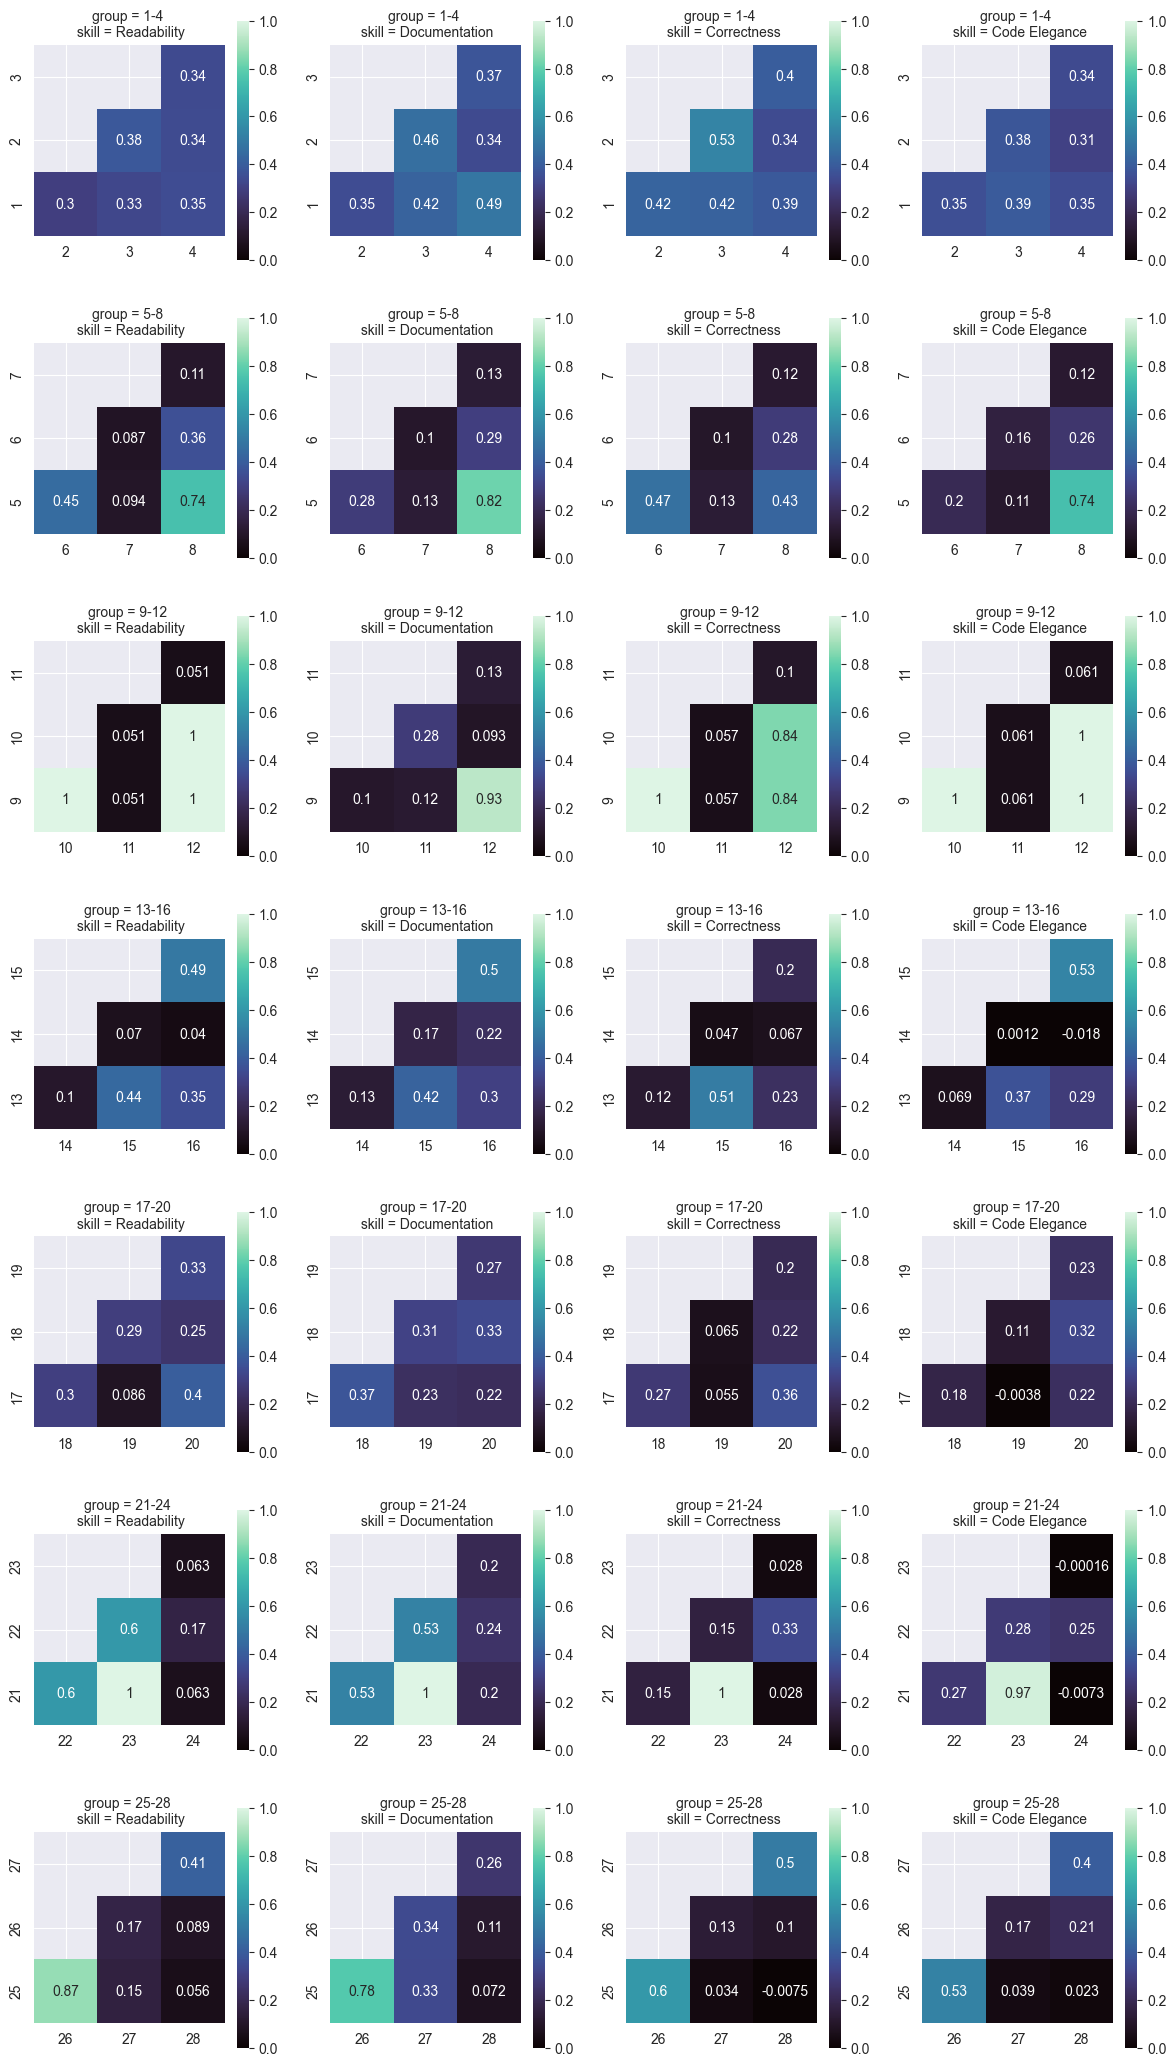

In [15]:
skills = inter_rater_sim_df['skill'].unique()
groups = inter_rater_sim_df['group'].unique()
g = sns.FacetGrid(inter_rater_sim_df, row='group', col='skill', 
                  col_order=skills, row_order=groups, sharey=False, sharex=False)
g.set_titles('{row_var} = {row_name} \n {col_var} = {col_name}')

for col_idx, group in enumerate(groups):
    for row_idx, skill in enumerate(skills):
        print(group, skill)
        a = sns.heatmap(ax=g.axes[col_idx, row_idx], data=generate_heatmap_data(skill=skill, group=group), square=True, cmap=sns.color_palette("mako", as_cmap=True), annot=True, vmin=0, vmax=1)
        a.set(xlabel='', ylabel='')
        a.invert_yaxis()
        
        
g.savefig('../plots/inter_rater_sim_heatmap.pdf', bbox_inches='tight')